Frameworks para Deep Learning
=============================

Introducción
------------

`PyTorch` y `TensorFlow` son probablemente los framewors de deep learning más populares. Tanto `PyTorch` como `Tensorflow` son muy populares tanto en marcos de academia como de industria. De hecho, los científicos de datos las consideran a menudo las bibliotecas de referencia cuando se trata del desarrollo de aplicaciones innovadoras de aprendizaje profundo o incluso la investigación.

### DAGs

Algo importante para tener en cuenta es que estos frameworks utilizan **grafos** para describir cálculos. Usualmente una red se ve como un DAG (Grafo Acíclico Dirigido) el cual se opera con tensores. Un grafo es una estructura de datos que consta de nodos y arcos. Durante el proceso de entrenamiento de las redes neuronales profundas, los grafos de cálculo almacenan las activaciones de la red neuronal durante una pasada "hacia adelante". Luego, una pasada hacia atrás (backpropagation) utiliza los grafos de cálculo para calcular las actualizaciones de cada uno de los pesos de la red, entrenando así la red.

<img src="https://github.com/santiagxf/M72109/blob/master/docs/_images/framworks_dag.png?raw=1" width="500" />

TensorFlow
----------

`TensorFlow` es una biblioteca de aprendizaje automático de código abierto creada por el equipo de Google Brain. Su lanzamiento inicial fue en 2015 y está escrito en `Python`, `C++` y `CUDA`.

De manera similar a `PyTorch`, `TensorFlow` también tiene un gran enfoque en las redes neuronales y deep learning y permite al usuario crear y combinar diferentes tipos de modelos de aprendizaje profundo y generar gráficos del rendimiento del modelo durante el entrenamiento. Aunque es una biblioteca de `Python`, en 2017 `TensorFlow` introdujo además una interfaz en `R` para `RStudio`.

### APIs

`TensorFlow` posee diferentes APIs (interfaces de programación) y diferentes modos de ejecución. Esta fuera del alcance ver las diferencias entre estos métodos.

#### API secuencial

Un modelo secuencial es apropiado para crear una red profunda simple de capas donde cada capa tiene exactamente un tensor de entrada y un tensor de salida.

Por ejemplo:

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

x = tf.ones((3, 3))
y = model(x)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               multiple                  8         
_________________________________________________________________
layer2 (Dense)               multiple                  9         
_________________________________________________________________
layer3 (Dense)               multiple                  16        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


Noten que no hemos indicado como luce la entrada de nuestra red en el modelo secuencias en ninguna de las capas. Esto se debe a que el modelo secuencial interpreta que la salida de una capa es la entrada de la siguiente, por lo tanto las dimensiones deben de coincidir forzadamente. 

Sin embargo, tampoco indicamos las dimensiones de los vectores de entrada. `TensorFlow` interpreta la entrada de forma dinámica y es por eso que cuando llamamos a `model(x)` con un tensor de dimensiones `(3,3)` en este momento `TensorFlow` sabe que la entrada es un tensor de dimensiones `(3)`.

Podemos de todas formas explicitar esto:

In [ ]:
model = keras.Sequential(
    [
        layers.Input((3,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 2)                 8         
_________________________________________________________________
layer2 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer3 (Dense)               (None, 4)                 16        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


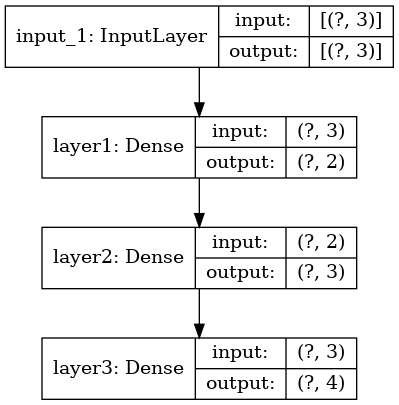

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Noten que las dimensiones de entrada que indicamos fueron `(3,)` en lugar de `(3,3)`. **¿Puede identificar porque?**

Un modelo secuencial no es apropiado cuando:

- El modelo tiene múltiples entradas o múltiples salidas
- Cualquiera de las capas tiene múltiples entradas o múltiples salidas
- Necesitamos compartir capas
- Necesitamos una topología no lineal (por ejemplo, una conexión residual, un modelo de varias ramas)

Para mas información recomendamos la lectura de: https://keras.io/guides/sequential_model/

#### API funcional

<div class="admonition warning">PRECAUCIÓN 😱: El tema presentado en esta sección está clasificado como avanzado. El entendimiento de este contenido es totalmente opcional.</div>

La API funcional de `Keras` es una forma de crear modelos que son más flexibles que la API `tf.keras.Sequential`. La API funcional puede manejar modelos con topología no lineal, capas compartidas e incluso múltiples entradas o salidas.

La idea principal es que un modelo de aprendizaje profundo suele ser un grafo acíclico dirigido (DAG) de capas. Entonces, la API funcional es una forma de crear grafos de capas. 

El siguiente código genera un modelo identico al anterior:

In [ ]:
inputs = keras.Input(shape=(3,))
layer1_output = layers.Dense(2, activation="relu", name="layer1")(inputs)
layer2_output = layers.Dense(3, activation="relu", name="layer2")(layer1_output)
outputs = layers.Dense(4, name="layer3")(layer2_output)

model = keras.Model(inputs=inputs, outputs=outputs, name="functional_api")

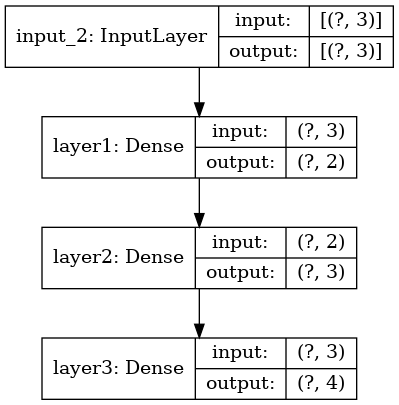

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Lo interesante de esta API es que no solo nos permite conectar cualquier entrada con cualquier salida, sino que ademas poder inspeccionar los tensor intermediarios:

In [ ]:
layer2_output.shape

TensorShape([None, 3])

PyTorch
-------

`PyTorch` es una biblioteca de aprendizaje automático desarrollada por Facebook AI Research Lab. Se introdujo por primera vez en 2016 y se distribuye con la licencia BSD como software gratuito de código abierto.

`PyTorch` tiene está disponible para `Python` y sus funcionalidades están construidas como clases de `Python`, por lo que forman parte del ecosistema de paquetes. Al ser una biblioteca basada en `Python`, es más fácil ampliar sus funcionalidades con otras bibliotecas de Python, como `SciPy` y `NumPy`. Sin embargo, los usuarios de `PyTorch` también pueden programar en `C/C++` ya que la biblioteca comparte algo de backend de `C++` con Torch, que es el núcleo del procesamiento de deep learning.

> En este curso no trabajaremos con `PyTorch` especificamente pero el lector puede revisar la guia https://pytorch.org/tutorials/beginner/pytorch_with_examples.html para familiarizarse con este framework

Eligiendo un framework
----------------------

Tanto `PyTorch` como `TensorFlow` son herramientas increíbles; de lo contrario, no serían tan populares. De hecho, han realizado tantas mejoras a lo largo de los años que elegir entre ambos nunca ha sido más desafiante. Esto quiere decir que cualquier elección que hagamos en general estará bien.

<img src="https://github.com/santiagxf/M72109/blob/master/docs/_images/framworks_vs.png?raw=1" width="500" />

Un enfoque útil y muy simple para elegir entre ambas herramientas es que si el usuario está acostumbrado a usar `Python` como lenguaje de programación, entonces `PyTorch` es una buena opción ya que es muy amigable con este lenguaje. `PyTorch` ha ganado mucha popularidad entre los desarrolladores orientados a la investigación, apoyando el entrenamiento dinámico (es decir que los computos se realizan a medida que se define el grafo). Esta ultima caracteristica le da versatilidad a la hora de corregir errores de codigo (funcionalidad que `TensorFlow` agerga a partir de la version 2.2).

`TensorFlow` ofrece varias opciones para el desarrollo de modelos de alto nivel y, por lo general, se considera una biblioteca más madura que `PyTorch`. Además, este marco ofrece soporte para plataformas móviles. Una de las ventajas más amplias es la alta integración (ya que ahora es parte de este framework) de `Keras` el cual nos permite definir una red neuronal de una forma más amigable y a alto nivel.